## Source Data

In [ ]:
import gdown
import tensorflow as tf
import numpy as np
import os
import random
import networkx as nx
import csv

!mkdir datasets
!pip install pyvis
from pyvis.network import Network

#############################################################################################
# Facebook DATASET DOWNLOADS source: https://github.com/fatemehsrz/Shortest_Distance/tree/master/data
#############################################################################################
# Download facebook dataset edgelist in txt format (extracted from mtx)
#!gdown https://drive.google.com/uc?id=1v03XWRternGLDpRfKbRGoMiVX3dpOW3G -O datasets/facebook_edges.txt


# Download douban data random landmark
!gdown https://drive.google.com/uc?id=1cYDAovCE5V0JUGvxtKea1ltqNh2vkVfM -O ./datasets/train_douban_random.txt
!gdown https://drive.google.com/uc?id=1Zlsg-MEvarmr5IZwvIc1yIAA_CqPbdl5 -O ./datasets/test_douban_random.txt

# Download douban data corasening landmark
!gdown https://drive.google.com/uc?id=1XxPvfkF2Jyfel-anUUcq4qgEwjgFKyww -O ./datasets/train_douban_coarsening.txt
!gdown https://drive.google.com/uc?id=1LzS4WrfLwAhJuxIMSde5hEFVyd09qA7u -O ./datasets/test_douban_coarsening.txt


#############################################################################################
# Embedding DOWNLOADS
#############################################################################################
# Download pretrained facebook embeddings
!gdown https://drive.google.com/uc?id=1qM59P-clGgwaZA9wC_WM38ry5RcolrzH -O datasets/douban_harp_node2vec.npy
!gdown https://drive.google.com/uc?id=1pCNuXtIwikiAw8GsbxMtI8DY_ZHC2Kiv -O datasets/douban_harp_line.npy
!gdown https://drive.google.com/uc?id=1XNc2LcfDOVvmy2T1DwcYZna_BzP93hvn -O datasets/douban_node2vec.npy




#############################################################################################
# BlogCatalog DATASET DOWNLOADS source: http://datasets.syr.edu/pages/datasets.html
#############################################################################################
# Download blogcatalog dataset edgelist in cvs format
#!gdown https://drive.google.com/uc?id=1EcaUE7hyzTLybL-6oLrSiLzRXzlNLS1i -O datasets/blogcatalog_edges.csv

#############################################################################################
# Douban DATASET DOWNLOADS source: http://datasets.syr.edu/pages/datasets.html
#############################################################################################
# Download blogcatalog dataset edgelist in cvs format
#!gdown https://drive.google.com/uc?id=1ssjgKF5WpiXcIk7DfF6BXwPoWkqr5rOS -O datasets/douban_edges.csv

#############################################################################################
# Lastfm DATASET DOWNLOADS source: http://datasets.syr.edu/pages/datasets.html
#############################################################################################
# Download blogcatalog dataset edgelist in cvs format
#!gdown https://drive.google.com/uc?id=1S83GMt_ARPfHFtoV_fpJHsFv5pqUrUWF -O datasets/lastfm_edges.csv

#############################################################################################
# Youtube DATASET DOWNLOADS  source: http://datasets.syr.edu/pages/datasets.html
#############################################################################################
#!gdown https://drive.google.com/uc?id=12aGrbOZqVMfOP46X8lj5qwqQui4kbMjZ -O datasets/youtube_edges.csv

#############################################################################################
# Flickr DATASET DOWNLOADS  source: http://networkrepository.com/soc-flickr-und.php
#############################################################################################
#!gdown https://drive.google.com/uc?id=1UFr2R3hBkWW22Ulke0cczzL9Qt3ySNMw -O datasets/flickr_edges.txt

#############################################################################################
# FRAMEWORK SETUPS
#############################################################################################
# Graph embeddings framework @see: https://github.com/shenweichen/GraphEmbedding
!gdown https://drive.google.com/uc?id=1QwaC2pz6wC8QGAA1N7208SxEzdPfkn3S -O GraphEmbedding.zip
!unzip GraphEmbedding.zip
# HARP
#!gdown https://drive.google.com/uc?id=174k2qDmDhXrKFivGD00jBWAvJp9b1kiq -O HARP.zip
#!unzip HARP.zip

mkdir: cannot create directory ‘datasets’: File exists
Downloading...
From: https://drive.google.com/uc?id=1cYDAovCE5V0JUGvxtKea1ltqNh2vkVfM
To: /content/datasets/train_douban_random.txt
24.1MB [00:01, 20.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Zlsg-MEvarmr5IZwvIc1yIAA_CqPbdl5
To: /content/datasets/test_douban_random.txt
8.50MB [00:00, 39.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XxPvfkF2Jyfel-anUUcq4qgEwjgFKyww
To: /content/datasets/train_douban_coarsening.txt
24.1MB [00:00, 147MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LzS4WrfLwAhJuxIMSde5hEFVyd09qA7u
To: /content/datasets/test_douban_coarsening.txt
8.67MB [00:00, 76.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qM59P-clGgwaZA9wC_WM38ry5RcolrzH
To: /content/datasets/douban_harp_node2vec.npy
79.3MB [00:00, 191MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pCNuXtIwikiAw8GsbxMtI8DY_ZHC2Kiv
To: /content/datasets/douban_harp_line.npy
79.3MB [00:00, 190MB/s]
Do

## Set Flags and Seed

In [ ]:
dataset = "douban" # possible values: facebook, blogcatalog, douban, lastfm, youtube, flickr
is_new_data_split = False # sets whether to create new data and train set or rely on existing train-test files which were downloaded before
landmark_technique = "random" # possible values: random, coarsening, community_detection
embedding_method = "node2vec" # possible values: node2vec, struc2vec, deepwalk, line, sdne, harp_node2vec, harp_deepwalk, harp_line

# Setting different seeds for reproducability
seed_value= 122
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

## Preprocess Data

### Split Train-Test

#### Load train set

In [ ]:

def load_training_data(dataset, landmark_technique):
  train_list1 = []
  train_list2 = []
  y_train = []
  f_train = open('./datasets/train_'+dataset+'_'+landmark_technique+'.txt', 'r')
  for line in f_train:
    a=line.strip('\n').split(' ')
    train_list1.append(int(a[0])) 
    train_list2.append(int(a[1]))
    y_train.append(int(a[2]))
  f_train.close()
  print("Number of training pairs:", len(y_train))
  print("Path Lengths in train set: ",np.unique(np.array(y_train))," Size of each length: ", np.unique(np.array(y_train),return_counts=True)[1])
  return train_list1, train_list2, y_train


#### Load test set

In [ ]:
def load_testing_data(dataset, landmark_technique):

  y_test = []

  # Load test set from txt
  test_list1=[]
  test_list2=[]    
  f_test= open('./datasets/test_'+dataset+'_'+landmark_technique+'.txt', 'r') 

  for line in f_test:
    a=line.strip('\n').split(' ')
    test_list1.append(int(a[0])) 
    test_list2.append(int(a[1]))
    y_test.append(int(a[2]))
  f_test.close()
  print("Number of testing pairs:", len(y_test))
  print("Path Lengths in test set: ",np.unique(np.array(y_test))," Size of each length: ", np.unique(np.array(y_test),return_counts=True)[1])
  return test_list1, test_list2, y_test


## Create Emeddings

#### Train embeddings

In [ ]:
from GraphEmbedding.ge.models import Node2Vec, DeepWalk, SDNE, Struc2Vec, LINE
from collections import OrderedDict

def load_embedding(embedding_method="node2vec", dataset="facebook"):
  try:
    embedding_vectors_res = np.load("./datasets/"+dataset+"_"+embedding_method+".npy")
  except:
    print("The requested embedding does not exist")
  print("EMBEDDING VECTORS SHAPE:", embedding_vectors_res.shape)
  return embedding_vectors_res


### Preprocess embeddings

In [ ]:
def preprocess_embeddings(embedding_vectors, train_list1, train_list2, test_list1, test_list2, emb_size = 128, con_type = "avg"):
  X_train_binary = []
  X_test_binary = []
  print(embedding_vectors.shape)
  for i in range(len(train_list1)):
    if con_type == "avg":
      con_x = (embedding_vectors[train_list1[i]] + embedding_vectors[train_list2[i]])/2 
    elif con_type == "concat":
      con_x = np.concatenate( [embedding_vectors[train_list1[i]],embedding_vectors[train_list2[i]]], axis=0)
    elif con_type == "hadamard":
      con_x = embedding_vectors[train_list1[i]] * embedding_vectors[train_list2[i]]
    elif con_type =="sub":
      con_x = embedding_vectors[train_list1[i]] - embedding_vectors[train_list2[i]]
    elif con_type =="conv":
      con_x = [embedding_vectors[train_list1[i]],embedding_vectors[train_list2[i]]]

    X_train_binary.append(con_x)

  for i in range(len(test_list1)):
    if con_type == "avg":
      con_x = (embedding_vectors[test_list1[i]] + embedding_vectors[test_list2[i]])/2
    elif con_type == "concat":
      con_x = np.concatenate( [embedding_vectors[test_list1[i]],embedding_vectors[test_list2[i]]], axis=0)
    elif con_type == "hadamard":
      con_x = embedding_vectors[test_list1[i]] * embedding_vectors[test_list2[i]]
    elif con_type =="sub":
      con_x = embedding_vectors[test_list1[i]] - embedding_vectors[test_list2[i]]
    elif con_type =="conv":
      con_x = [embedding_vectors[test_list1[i]],embedding_vectors[test_list2[i]]]

    X_test_binary.append(con_x)

  print("Embedded training set size:", len(X_train_binary))
  print("Embedded test set size:", len(X_test_binary))

  train_test_split = [np.array(X_train_binary), np.array(y_train), np.array(X_test_binary), np.array(y_test)]
  if con_type == "conv":
    train_test_split[0] = train_test_split[0].reshape(-1, 2, emb_size, 1)
    train_test_split[2] = train_test_split[2].reshape(-1, 2, emb_size, 1)

  print("Train test split summary: \n", "Train X shape:", train_test_split[0].shape\
        ,"Train y shape:", train_test_split[1].shape,
        "\n Test X shape:", train_test_split[2].shape,
        "Test y shape:", train_test_split[3].shape)
  return train_test_split

# Shuffle for train data before training
def shuffle_in_unison(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

# Models

## MLP Regression

In [ ]:
import tensorflow.keras as keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,BatchNormalization,Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import SGD

def create_regression_model(input_dim, emb_size=128):
  model = Sequential()
  model.add(Dense(emb_size, input_dim=input_dim))
  model.add(Activation('relu'))
  model.add(Dropout(0.4))

  dense_size= int(0.2*input_dim)
  model.add(Dense(dense_size))
  model.add(Activation('relu'))
  model.add(Dropout(0.4))

  model.add(Dense(1))
  model.add(Activation('softplus'))

  opt=SGD(learning_rate=0.05, momentum=0.2)
  model.compile(loss='mse', optimizer='sgd', metrics=['mae'])
  #model.summary()
  return model

## MLP Regression with Conv Concat

In [ ]:
def create_regression_conv_model(emb_size=128):

  model = Sequential()
  model.add(Conv2D(1, (2,1),kernel_constraint="non_neg",use_bias=False,input_shape=(2,emb_size,1)))
  model.add(Flatten())
  model.add(Dense(emb_size))
  model.add(Activation('relu'))
  model.add(Dropout(0.4))

  dense_size= int(0.2*emb_size)
  model.add(Dense(dense_size))

  model.add(Activation('relu'))
  model.add(Dropout(0.4))

  model.add(Dense(1))
  model.add(Activation('softplus'))

  opt=SGD(learning_rate=0.05, momentum=0.01)
  model.compile(loss='mse', optimizer=opt, metrics=['mae'])
  return model

# Train Model

In [ ]:
import keras.callbacks as cb
from keras.callbacks import LambdaCallback

def train_regressor(model, X_train, y_train, epochs=15, batch_size = 32):
  class LossHistory(cb.Callback):
      def on_train_begin(self, logs={}):
          self.losses = []

      def on_batch_end(self, batch, logs={}):
          batch_loss = logs.get('loss')
          self.losses.append(batch_loss)
  history = LossHistory()
  model.fit(X_train, y_train, epochs= epochs, batch_size= batch_size, callbacks=[history], validation_split= 0.3, verbose=2)

# Test Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt

def test_model(model,X_train, X_test, y_test):
  preds = model.predict(X_test)
  pred = []

  for i in range(len(preds)):
    pred.append(round(float(preds[i][0])))

  rmse = (mean_squared_error(y_test, pred))**0.5
  mae = mean_absolute_error(y_test, pred)
  print("RMSE:", rmse, "MAE:", mae, "\nSummary:", "Train size:", len(X_train), "Test size:", len(X_test))
  
  accuracy = accuracy_score(y_test,pred)
  print('Accuracy: %f' % accuracy)
  print('Paths: \t\t',np.unique(y_test))
  precision = precision_score(y_test,pred,average=None)
  print('Precision: \t' , precision)
  recall = recall_score(y_test,pred,average=None)
  print('Recall: \t' , recall)
  f1 = f1_score(y_test,pred,average=None)
  print('F1 score: \t', f1)

  return rmse, mae, accuracy, precision, recall, f1

def test_model_detailed(model, X_test, y_test):
  preds = model.predict(X_test)
  pred = []

  indexes_2 = []
  indexes_3 = []
  indexes_4 = []
  indexes_5 = []
  indexes_6 = []
  y_test_2 = []
  y_test_3 = []
  y_test_4 = []
  y_test_5 = []
  y_test_6 = []

  pred_2 = []
  pred_3 = []
  pred_4 = []
  pred_5 = []
  pred_6 = []

  for i in range(len(y_test)):
      if y_test[i]==2:
          indexes_2.append(i)
          y_test_2.append(y_test[i])
      if y_test[i]==3:
          indexes_3.append(i)
          y_test_3.append(y_test[i])
      if y_test[i]==4:
          indexes_4.append(i)
          y_test_4.append(y_test[i])
      if y_test[i]==5:
          indexes_5.append(i)
          y_test_5.append(y_test[i])
      if y_test[i]==6:
          indexes_6.append(i)
          y_test_6.append(y_test[i])

  for i in range(len(y_test_2)):
    pred_2.append(round(float(preds[indexes_2[i]][0])))

  for i in range(len(y_test_3)):
    pred_3.append(round(float(preds[indexes_3[i]][0])))

  for i in range(len(y_test_4)):
    pred_4.append(round(float(preds[indexes_4[i]][0])))

  for i in range(len(y_test_5)):
    pred_5.append(round(float(preds[indexes_5[i]][0])))

  for i in range(len(y_test_6)):
    pred_6.append(round(float(preds[indexes_6[i]][0])))

  rmse2 = (mean_squared_error(y_test_2, pred_2))**0.5
  mae2 = mean_absolute_error(y_test_2, pred_2)

  rmse3 = (mean_squared_error(y_test_3, pred_3))**0.5
  mae3 = mean_absolute_error(y_test_3, pred_3)

  rmse4 = (mean_squared_error(y_test_4, pred_4))**0.5
  mae4 = mean_absolute_error(y_test_4, pred_4)

  rmse5 = (mean_squared_error(y_test_5, pred_5))**0.5
  mae5 = mean_absolute_error(y_test_5, pred_5)

  rmse6 = (mean_squared_error(y_test_6, pred_6))**0.5
  mae6 = mean_absolute_error(y_test_6, pred_6)

  print("RMSE at length 2:", rmse2, "MAE at length 2:", mae2)
  print("RMSE at length 3:", rmse3, "MAE at length 3:", mae3)
  print("RMSE at length 4:", rmse4, "MAE at length 4:", mae4)
  print("RMSE at length 5:", rmse5, "MAE at length 5:", mae5)
  print("RMSE at length 6:", rmse6, "MAE at length 6:", mae6)
  return rmse2, mae2, rmse3, mae3, rmse4, mae4, rmse5, mae5, rmse6, mae6

def plot_test_losses(model, X_test, y_test):
    rmse2, mae2, rmse3, mae3, rmse4, mae4, rmse5, mae5, rmse6, mae6 = test_model_detailed(model, X_test, y_test)

    labels = ['SP2', 'SP3', 'SP4', 'SP5', 'SP6']
    rmse_values = [rmse2, rmse3, rmse4, rmse5, rmse6]
    mae_values = [mae2, mae3, mae4, mae5, mae6]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, rmse_values, width, label='RMSE')
    rects2 = ax.bar(x + width/2, mae_values, width, label='MAE')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Loss values')
    ax.set_title('Losses by shortest path distance')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

### Train test loop

In [ ]:
def train_test_loop(emb_method, epochs, dataset ):
  print("#### TRAIN TEST LOOP")
  # Create Embeddings
  embedding_vectors = load_embedding(embedding_method= emb_method, dataset=dataset)

  # Test with avg binary operator
  print("Embedding method: ", emb_method, "Binary operator: avg")
  X_train, y_train, X_test, y_test = preprocess_embeddings(embedding_vectors, train_list1, train_list2, test_list1, test_list2, 128,"avg")
  shuffle_in_unison(X_train, y_train)
  print("\n")
  model = create_regression_model(X_train.shape[1])
  print("\n")
  train_regressor(model, X_train, y_train, epochs=epochs)
  print("\n")
  test_model(model, X_train, X_test, y_test)
  plot_test_losses(model, X_test, y_test)
  # Test with conc binary operator
  print("Embedding method: ", emb_method, "Binary operator: concat")
  X_train, y_train, X_test, y_test = preprocess_embeddings(embedding_vectors, train_list1, train_list2, test_list1, test_list2, 128,"concat")
  shuffle_in_unison(X_train, y_train)
  print("\n")
  model = create_regression_model(X_train.shape[1])
  print("\n")
  train_regressor(model, X_train, y_train, epochs=epochs)
  print("\n")
  test_model(model, X_train, X_test, y_test)
  plot_test_losses(model, X_test, y_test)
  # Test with convolution
  print("Embedding method: ", emb_method, "Binary operator: conv")
  X_train, y_train, X_test, y_test = preprocess_embeddings(embedding_vectors, train_list1, train_list2, test_list1, test_list2, 128,"conv")
  shuffle_in_unison(X_train, y_train)
  print("\n")
  model = create_regression_conv_model()
  print("\n")
  train_regressor(model, X_train, y_train, epochs=epochs)
  print("\n")
  test_model(model, X_train, X_test, y_test)
  plot_test_losses(model, X_test, y_test)

### Run tests



### LANDMARK RUN coarsening ###
Number of training pairs: 1769053
Path Lengths in train set:  [2 3 4 5 6]  Size of each length:  [464652 462245 431418 299136 111602]
Number of testing pairs: 604236
Path Lengths in test set:  [2 3 4 5 6]  Size of each length:  [154904 154800 152789 116422  25321]
### EMBEDDING RUN node2vec ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (154907, 128)
Embedding method:  node2vec Binary operator: avg
(154907, 128)
Embedded training set size: 1769053
Embedded test set size: 604236
Train test split summary: 
 Train X shape: (1769053, 128) Train y shape: (1769053,) 
 Test X shape: (604236, 128) Test y shape: (604236,)




Epoch 1/15
38699/38699 - 52s - loss: 0.4221 - mae: 0.5043 - val_loss: 0.2174 - val_mae: 0.3597
Epoch 2/15
38699/38699 - 61s - loss: 0.3088 - mae: 0.4329 - val_loss: 0.1862 - val_mae: 0.3172
Epoch 3/15
38699/38699 - 52s - loss: 0.2853 - mae: 0.4147 - val_loss: 0.1711 - val_mae: 0.2872
Epoch 4/15
38699/38699 - 61s - loss: 0.2734 - mae: 0.40

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 	 [0.         1.         0.21404481 0.11260528 0.14541727 0.
 0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.00328811 0.08141293 0.39573277 0.70597528 0.
 0.        ]
F1 score: 	 [0.         0.00655467 0.11795944 0.1753227  0.2411602  0.
 0.        ]
RMSE at length 2: 2.971048912896579 MAE at length 2: 2.9511439343077
RMSE at length 3: 1.8909583586668128 MAE at length 3: 1.8278940568475452
RMSE at length 4: 1.2660995497798266 MAE at length 4: 1.1401082538664433
RMSE at length 5: 0.8869601965920432 MAE at length 5: 0.6648485681400422
RMSE at length 6: 0.5462677326053539 MAE at length 6: 0.2954859602701315


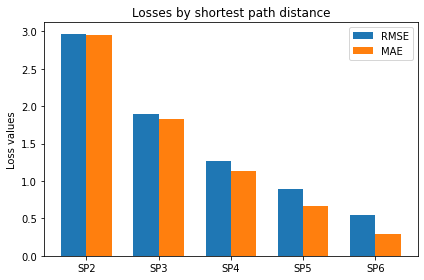

Embedding method:  node2vec Binary operator: concat
(154907, 128)
Embedded training set size: 1769053
Embedded test set size: 604236
Train test split summary: 
 Train X shape: (1769053, 256) Train y shape: (1769053,) 
 Test X shape: (604236, 256) Test y shape: (604236,)




Epoch 1/15
38699/38699 - 67s - loss: 0.3607 - mae: 0.4578 - val_loss: 0.1841 - val_mae: 0.3274
Epoch 2/15
38699/38699 - 58s - loss: 0.2678 - mae: 0.3950 - val_loss: 0.1619 - val_mae: 0.2839
Epoch 3/15
38699/38699 - 67s - loss: 0.2441 - mae: 0.3757 - val_loss: 0.1363 - val_mae: 0.2599
Epoch 4/15
38699/38699 - 58s - loss: 0.2316 - mae: 0.3654 - val_loss: 0.1323 - val_mae: 0.2581
Epoch 5/15
38699/38699 - 58s - loss: 0.2224 - mae: 0.3573 - val_loss: 0.1333 - val_mae: 0.2484
Epoch 6/15
38699/38699 - 67s - loss: 0.2141 - mae: 0.3502 - val_loss: 0.2186 - val_mae: 0.3622
Epoch 7/15
38699/38699 - 67s - loss: 0.2095 - mae: 0.3460 - val_loss: 0.1397 - val_mae: 0.2814
Epoch 8/15
38699/38699 - 58s - loss: 0.2041 - mae: 0.3408 - 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 	 [0.00000000e+00 0.00000000e+00 6.29629630e-01 2.73058252e-02
 3.12537918e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.         0.00011126 0.00038652 0.0033569  0.
 0.         0.         0.         0.        ]
F1 score: 	 [0.         0.         0.00022249 0.00076226 0.00057184 0.
 0.         0.         0.         0.        ]
RMSE at length 2: 4.212549281694512 MAE at length 2: 4.191822031709962
RMSE at length 3: 3.423716493128921 MAE at length 3: 3.382532299741602
RMSE at length 4: 2.9124117220992525 MAE at length 4: 2.8366832690835073
RMSE at length 5: 2.6622699003833477 MAE at length 5: 2.566765731562763
RMSE at length 6: 2.2595845907615755 MAE at length 6: 2.1603412187512343


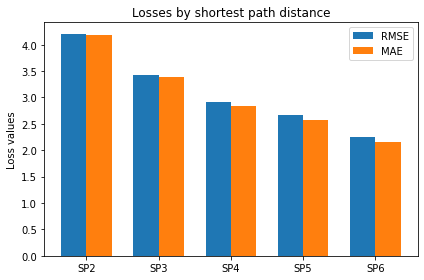

Embedding method:  node2vec Binary operator: conv
(154907, 128)
Embedded training set size: 1769053
Embedded test set size: 604236
Train test split summary: 
 Train X shape: (1769053, 2, 128, 1) Train y shape: (1769053,) 
 Test X shape: (604236, 2, 128, 1) Test y shape: (604236,)




Epoch 1/15
38699/38699 - 84s - loss: 0.3613 - mae: 0.4660 - val_loss: 0.2003 - val_mae: 0.3410
Epoch 2/15
38699/38699 - 86s - loss: 0.2936 - mae: 0.4178 - val_loss: 0.1752 - val_mae: 0.2856
Epoch 3/15
38699/38699 - 87s - loss: 0.2796 - mae: 0.4064 - val_loss: 0.2312 - val_mae: 0.3854
Epoch 4/15
38699/38699 - 87s - loss: 0.2715 - mae: 0.3996 - val_loss: 0.4293 - val_mae: 0.4838
Epoch 5/15
38699/38699 - 82s - loss: 0.2669 - mae: 0.3954 - val_loss: 0.2132 - val_mae: 0.3734
Epoch 6/15
38699/38699 - 86s - loss: 0.2628 - mae: 0.3919 - val_loss: 0.1483 - val_mae: 0.2971
Epoch 7/15
38699/38699 - 86s - loss: 0.2602 - mae: 0.3897 - val_loss: 1.2355 - val_mae: 0.8638
Epoch 8/15
38699/38699 - 82s - loss: 0.2584 - mae:

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.         0.00098829 0.00231915 0.01018917 0.
 0.         0.         0.         0.         0.        ]
F1 score: 	 [0.         0.         0.00197331 0.00430293 0.00421035 0.
 0.         0.         0.         0.         0.        ]
RMSE at length 2: 5.128195082684885 MAE at length 2: 5.08274156897175
RMSE at length 3: 3.85173540538222 MAE at length 3: 3.7780620155038758
RMSE at length 4: 3.3393954479807206 MAE at length 4: 3.2138046587123417
RMSE at length 5: 3.125530997129603 MAE at length 5: 2.969198261496968
RMSE at length 6: 2.7641804383067243 MAE at length 6: 2.592788594447297


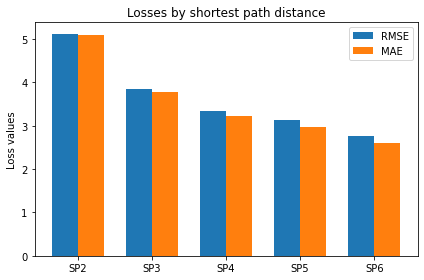

### EMBEDDING RUN harp_node2vec ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (154907, 128)
Embedding method:  harp_node2vec Binary operator: avg
(154907, 128)
Embedded training set size: 1769053
Embedded test set size: 604236
Train test split summary: 
 Train X shape: (1769053, 128) Train y shape: (1769053,) 
 Test X shape: (604236, 128) Test y shape: (604236,)




Epoch 1/15
38699/38699 - 52s - loss: 0.4843 - mae: 0.5429 - val_loss: 0.3014 - val_mae: 0.4041
Epoch 2/15
38699/38699 - 61s - loss: 0.3688 - mae: 0.4712 - val_loss: 0.2427 - val_mae: 0.3610
Epoch 3/15
38699/38699 - 52s - loss: 0.3392 - mae: 0.4494 - val_loss: 0.2451 - val_mae: 0.3461
Epoch 4/15
38699/38699 - 62s - loss: 0.3226 - mae: 0.4363 - val_loss: 0.2100 - val_mae: 0.3427
Epoch 5/15
38699/38699 - 61s - loss: 0.3111 - mae: 0.4270 - val_loss: 0.1974 - val_mae: 0.3178
Epoch 6/15
38699/38699 - 62s - loss: 0.3039 - mae: 0.4206 - val_loss: 0.1866 - val_mae: 0.3203
Epoch 7/15
38699/38699 - 52s - loss: 0.2975 - mae: 0.4154

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 	 [0.         0.3348916  0.37952562 0.4985341  0.52785146]
Recall: 	 [0.         0.64372093 0.66248879 0.16796654 0.01571818]
F1 score: 	 [0.         0.44057628 0.48258731 0.25127372 0.03052733]
RMSE at length 2: 1.1068164287875537 MAE at length 2: 1.075014202344678
RMSE at length 3: 0.609215405954834 MAE at length 3: 0.36123385012919895
RMSE at length 4: 0.5809740469151553 MAE at length 4: 0.33751775324139827
RMSE at length 5: 1.052058405407605 MAE at length 5: 0.9236312724399168
RMSE at length 6: 1.6355345738580582 MAE at length 6: 1.5415267959401286


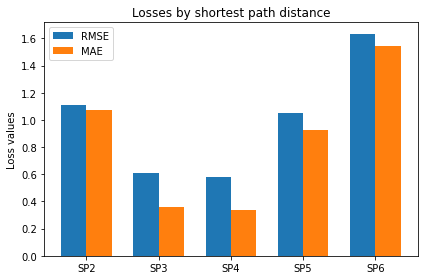

Embedding method:  harp_node2vec Binary operator: concat
(154907, 128)
Embedded training set size: 1769053
Embedded test set size: 604236
Train test split summary: 
 Train X shape: (1769053, 256) Train y shape: (1769053,) 
 Test X shape: (604236, 256) Test y shape: (604236,)




Epoch 1/15
38699/38699 - 59s - loss: 0.4347 - mae: 0.5067 - val_loss: 0.2514 - val_mae: 0.3600
Epoch 2/15
38699/38699 - 58s - loss: 0.3196 - mae: 0.4300 - val_loss: 0.2141 - val_mae: 0.3277
Epoch 3/15
38699/38699 - 67s - loss: 0.2906 - mae: 0.4063 - val_loss: 0.1952 - val_mae: 0.3095
Epoch 4/15
38699/38699 - 67s - loss: 0.2753 - mae: 0.3932 - val_loss: 0.2729 - val_mae: 0.3438
Epoch 5/15
38699/38699 - 58s - loss: 0.2648 - mae: 0.3845 - val_loss: 0.1822 - val_mae: 0.2879
Epoch 6/15
38699/38699 - 66s - loss: 0.2581 - mae: 0.3789 - val_loss: 0.5679 - val_mae: 0.6522
Epoch 7/15
38699/38699 - 58s - loss: 0.2588 - mae: 0.3798 - val_loss: 0.1698 - val_mae: 0.2855
Epoch 8/15
38699/38699 - 58s - loss: 0.2511 - mae: 0.37

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 	 [0.         0.2777413  0.24447527 0.35408477 0.39274924]
Recall: 	 [0.         0.02459302 0.68169829 0.49826493 0.01026816]
F1 score: 	 [0.         0.04518507 0.35988584 0.41398037 0.02001309]
RMSE at length 2: 2.0845579041454245 MAE at length 2: 2.0548016836234053
RMSE at length 3: 1.2301997694960836 MAE at length 3: 1.154735142118863
RMSE at length 4: 0.5645824239143297 MAE at length 4: 0.31845224459876037
RMSE at length 5: 0.7219706986540397 MAE at length 5: 0.5082372747418873
RMSE at length 6: 1.3100245984261125 MAE at length 6: 1.2307175861932782


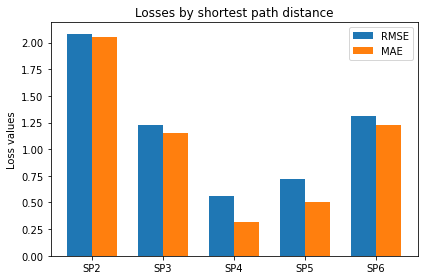

Embedding method:  harp_node2vec Binary operator: conv
(154907, 128)
Embedded training set size: 1769053
Embedded test set size: 604236
Train test split summary: 
 Train X shape: (1769053, 2, 128, 1) Train y shape: (1769053,) 
 Test X shape: (604236, 2, 128, 1) Test y shape: (604236,)




Epoch 1/15
38699/38699 - 85s - loss: 0.4086 - mae: 0.4945 - val_loss: 0.2193 - val_mae: 0.3331
Epoch 2/15
38699/38699 - 85s - loss: 0.3265 - mae: 0.4402 - val_loss: 0.2153 - val_mae: 0.3229
Epoch 3/15
38699/38699 - 89s - loss: 0.3103 - mae: 0.4275 - val_loss: 0.1818 - val_mae: 0.3111
Epoch 4/15
38699/38699 - 85s - loss: 0.3016 - mae: 0.4202 - val_loss: 0.1969 - val_mae: 0.2941
Epoch 5/15
38699/38699 - 86s - loss: 0.2967 - mae: 0.4161 - val_loss: 0.1864 - val_mae: 0.3081
Epoch 6/15
38699/38699 - 90s - loss: 0.2931 - mae: 0.4130 - val_loss: 0.1996 - val_mae: 0.3289
Epoch 7/15
38699/38699 - 86s - loss: 0.2896 - mae: 0.4099 - val_loss: 1.3208 - val_mae: 0.8748
Epoch 8/15
38699/38699 - 89s - loss: 0.2870 -

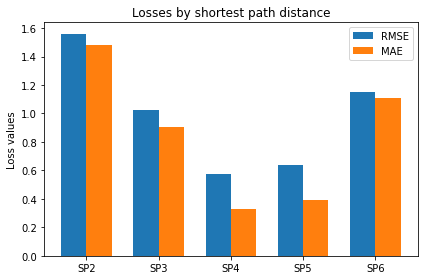

### EMBEDDING RUN harp_line ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (154907, 128)
Embedding method:  harp_line Binary operator: avg
(154907, 128)
Embedded training set size: 1769053
Embedded test set size: 604236
Train test split summary: 
 Train X shape: (1769053, 128) Train y shape: (1769053,) 
 Test X shape: (604236, 128) Test y shape: (604236,)




Epoch 1/15
38699/38699 - 64s - loss: 0.5234 - mae: 0.5582 - val_loss: 0.3112 - val_mae: 0.4211
Epoch 2/15
38699/38699 - 62s - loss: 0.4012 - mae: 0.4833 - val_loss: 0.2735 - val_mae: 0.3765
Epoch 3/15
38699/38699 - 53s - loss: 0.3740 - mae: 0.4623 - val_loss: 0.2870 - val_mae: 0.3753
Epoch 4/15
38699/38699 - 53s - loss: 0.3592 - mae: 0.4508 - val_loss: 0.2542 - val_mae: 0.3424
Epoch 5/15
38699/38699 - 52s - loss: 0.3481 - mae: 0.4415 - val_loss: 0.2348 - val_mae: 0.3364
Epoch 6/15
38699/38699 - 53s - loss: 0.3420 - mae: 0.4363 - val_loss: 0.2448 - val_mae: 0.3379
Epoch 7/15
38699/38699 - 62s - loss: 0.3358 - mae: 0.4314 - val_l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 	 [0.         0.33182934 0.35103129 0.61500705 0.28125   ]
Recall: 	 [0.00000000e+00 8.66563307e-01 3.68030421e-01 2.09865833e-01
 7.10872398e-04]
F1 score: 	 [0.         0.47989468 0.35932992 0.31294268 0.00141816]
RMSE at length 2: 1.098867219898714 MAE at length 2: 1.06779682900377
RMSE at length 3: 0.3764463923388157 MAE at length 3: 0.1361950904392765
RMSE at length 4: 0.7950021910195737 MAE at length 4: 0.6319892138831984
RMSE at length 5: 1.266908624710571 MAE at length 5: 1.0617752658432256
RMSE at length 6: 1.9490367173117815 MAE at length 6: 1.8328660005529007


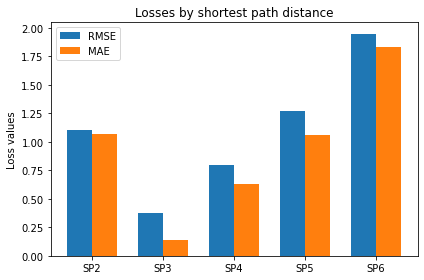

Embedding method:  harp_line Binary operator: concat
(154907, 128)
Embedded training set size: 1769053
Embedded test set size: 604236
Train test split summary: 
 Train X shape: (1769053, 256) Train y shape: (1769053,) 
 Test X shape: (604236, 256) Test y shape: (604236,)




Epoch 1/15
38699/38699 - 67s - loss: 0.4595 - mae: 0.5159 - val_loss: 0.2939 - val_mae: 0.3798
Epoch 2/15
38699/38699 - 67s - loss: 0.3471 - mae: 0.4438 - val_loss: 0.2496 - val_mae: 0.3508
Epoch 3/15
38699/38699 - 67s - loss: 0.3204 - mae: 0.4232 - val_loss: 0.2307 - val_mae: 0.3254
Epoch 4/15
38699/38699 - 58s - loss: 0.3055 - mae: 0.4108 - val_loss: 0.2286 - val_mae: 0.3086
Epoch 5/15
38699/38699 - 68s - loss: 0.2952 - mae: 0.4019 - val_loss: 0.2088 - val_mae: 0.3120
Epoch 6/15
38699/38699 - 67s - loss: 0.2875 - mae: 0.3954 - val_loss: 0.2152 - val_mae: 0.3030
Epoch 7/15
38699/38699 - 58s - loss: 0.2820 - mae: 0.3906 - val_loss: 0.2043 - val_mae: 0.3000
Epoch 8/15
38699/38699 - 67s - loss: 0.2778 - mae: 0.3873 -

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 	 [0.         0.25872692 0.13211071 0.55555556 0.        ]
Recall: 	 [0.00000000e+00 9.99916021e-01 5.09198961e-03 3.43577674e-04
 0.00000000e+00]
F1 score: 	 [0.         0.41108591 0.00980602 0.00068673 0.        ]
RMSE at length 2: 1.0000193666461183 MAE at length 2: 1.0000129112224345
RMSE at length 3: 0.009164023579485961 MAE at length 3: 8.397932816537468e-05
RMSE at length 4: 0.997460598377089 MAE at length 4: 0.9949145553672057
RMSE at length 5: 1.9739786496998184 MAE at length 5: 1.965290065451547
RMSE at length 6: 2.9616241433454755 MAE at length 6: 2.953753801192686


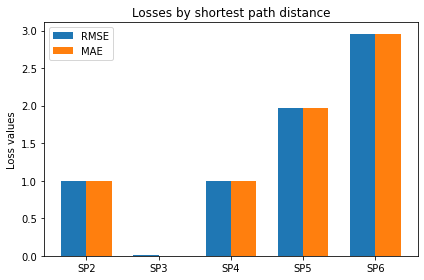

Embedding method:  harp_line Binary operator: conv
(154907, 128)
Embedded training set size: 1769053
Embedded test set size: 604236
Train test split summary: 
 Train X shape: (1769053, 2, 128, 1) Train y shape: (1769053,) 
 Test X shape: (604236, 2, 128, 1) Test y shape: (604236,)




Epoch 1/15
38699/38699 - 82s - loss: 0.4458 - mae: 0.5162 - val_loss: 0.2742 - val_mae: 0.3604
Epoch 2/15
38699/38699 - 86s - loss: 0.3750 - mae: 0.4692 - val_loss: 0.2522 - val_mae: 0.3418
Epoch 3/15
38699/38699 - 85s - loss: 0.3596 - mae: 0.4575 - val_loss: 0.2435 - val_mae: 0.3733
Epoch 4/15
38699/38699 - 86s - loss: 0.3501 - mae: 0.4500 - val_loss: 0.2334 - val_mae: 0.3393
Epoch 5/15
38699/38699 - 81s - loss: 0.3445 - mae: 0.4454 - val_loss: 0.4314 - val_mae: 0.5412
Epoch 6/15
38699/38699 - 86s - loss: 0.3405 - mae: 0.4423 - val_loss: 0.2224 - val_mae: 0.3492
Epoch 7/15
38699/38699 - 85s - loss: 0.3369 - mae: 0.4392 - val_loss: 1.3820 - val_mae: 1.0310
Epoch 8/15
38699/38699 - 85s - loss: 0.3348 - mae

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 	 [0.         0.34310025 0.29055221 0.30826173 0.         0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.06455611 0.45957364 0.66612125 0.         0.        ]
F1 score: 	 [0.         0.10866612 0.35602063 0.42147634 0.         0.        ]
RMSE at length 2: 1.312813904984044 MAE at length 2: 1.198122708258018
RMSE at length 3: 0.7351369645101158 MAE at length 3: 0.5404263565891473
RMSE at length 4: 0.6480418528669553 MAE at length 4: 0.3622315742625451
RMSE at length 5: 1.2500811675902876 MAE at length 5: 1.184131865111405
RMSE at length 6: 2.1240227613309677 MAE at length 6: 2.101694245882864


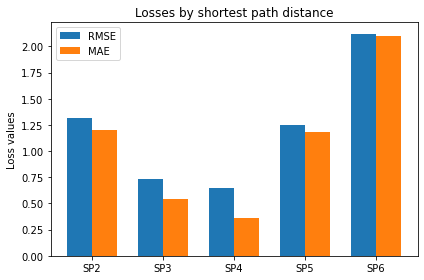

In [ ]:
landmark_techniques = ["coarsening"]
embedding_techniques = ["node2vec", "harp_node2vec", "harp_line"]
for landmark_technique in landmark_techniques:
  print("### LANDMARK RUN", landmark_technique, "###")
  train_list1, train_list2, y_train = load_training_data(dataset, landmark_technique)
  test_list1, test_list2, y_test = load_testing_data(dataset, landmark_technique)
  for embedding_technique in embedding_techniques:
    print("### EMBEDDING RUN", embedding_technique, "###")
    train_test_loop(emb_method = embedding_technique, epochs= 15,dataset= dataset) # No embeddings params set as default values are the optimised ones


### LANDMARK RUN random ###
Number of training pairs: 1792196
Path Lengths in train set:  [2 3 4 5 6]  Size of each length:  [464697 463845 450141 318817  94696]
Number of testing pairs: 621081
Path Lengths in test set:  [2 3 4 5 6]  Size of each length:  [154905 154841 152718 131027  27590]
### EMBEDDING RUN node2vec ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (154907, 128)
Embedding method:  node2vec Binary operator: avg
(154907, 128)
Embedded training set size: 1792196
Embedded test set size: 621081
Train test split summary: 
 Train X shape: (1792196, 128) Train y shape: (1792196,) 
 Test X shape: (621081, 128) Test y shape: (621081,)




Epoch 1/15
39205/39205 - 54s - loss: 0.6791 - mae: 0.6443 - val_loss: 0.4259 - val_mae: 0.4826
Epoch 2/15
39205/39205 - 53s - loss: 0.5070 - mae: 0.5486 - val_loss: 0.3746 - val_mae: 0.4390
Epoch 3/15
39205/39205 - 63s - loss: 0.4685 - mae: 0.5252 - val_loss: 0.3424 - val_mae: 0.4222
Epoch 4/15
39205/39205 - 53s - loss: 0.4488 - mae: 0.5127 -

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 	 [0.         0.33378079 0.22775162 0.47975748 0.19277108]
Recall: 	 [0.         0.54759398 0.51652065 0.07488533 0.00173976]
F1 score: 	 [0.         0.41475286 0.31611661 0.12954931 0.0034484 ]
RMSE at length 2: 1.7291020052481325 MAE at length 2: 1.6632645815177045
RMSE at length 3: 0.7031983319329149 MAE at length 3: 0.4664333090073043
RMSE at length 4: 0.6962161512361894 MAE at length 4: 0.4838918791498055
RMSE at length 5: 1.373581317833361 MAE at length 5: 1.245651659581613
RMSE at length 6: 2.2406909435067472 MAE at length 6: 2.1648785791953604


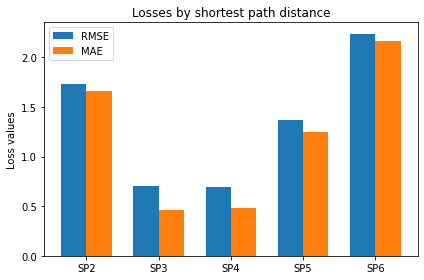

Embedding method:  node2vec Binary operator: concat
(154907, 128)
Embedded training set size: 1792196
Embedded test set size: 621081
Train test split summary: 
 Train X shape: (1792196, 256) Train y shape: (1792196,) 
 Test X shape: (621081, 256) Test y shape: (621081,)




Epoch 1/15
39205/39205 - 83s - loss: 0.6089 - mae: 0.6009 - val_loss: 0.3895 - val_mae: 0.4440
Epoch 2/15
39205/39205 - 88s - loss: 0.4534 - mae: 0.5112 - val_loss: 0.3302 - val_mae: 0.4107
Epoch 3/15
39205/39205 - 84s - loss: 0.4207 - mae: 0.4900 - val_loss: 0.3280 - val_mae: 0.4249
Epoch 4/15
39205/39205 - 82s - loss: 0.4020 - mae: 0.4779 - val_loss: 0.3052 - val_mae: 0.4123
Epoch 5/15
39205/39205 - 83s - loss: 0.3898 - mae: 0.4697 - val_loss: 0.2940 - val_mae: 0.3772
Epoch 6/15
39205/39205 - 82s - loss: 0.3808 - mae: 0.4635 - val_loss: 0.2819 - val_mae: 0.3534
Epoch 7/15
39205/39205 - 78s - loss: 0.3733 - mae: 0.4583 - val_loss: 0.2817 - val_mae: 0.3620
Epoch 8/15
39205/39205 - 75s - loss: 0.3682 - mae: 0.4547 - 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 	 [0.         0.30972477 0.27613447 0.46471329 0.27625899 0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.68111805 0.44427638 0.12116587 0.00695904 0.        ]
F1 score: 	 [0.         0.42581755 0.34058349 0.19221503 0.0135761  0.        ]
RMSE at length 2: 1.4129120019876344 MAE at length 2: 1.323391756237694
RMSE at length 3: 0.6387279079501224 MAE at length 3: 0.3484542207813176
RMSE at length 4: 0.7466009707999263 MAE at length 4: 0.5562867507431999
RMSE at length 5: 1.369338093448098 MAE at length 5: 1.2109183603379456
RMSE at length 6: 2.196829571616122 MAE at length 6: 2.0939108372598767


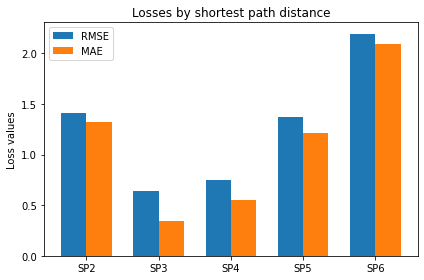

Embedding method:  node2vec Binary operator: conv
(154907, 128)
Embedded training set size: 1792196
Embedded test set size: 621081
Train test split summary: 
 Train X shape: (1792196, 2, 128, 1) Train y shape: (1792196,) 
 Test X shape: (621081, 2, 128, 1) Test y shape: (621081,)




Epoch 1/15
39205/39205 - 119s - loss: 0.5561 - mae: 0.5780 - val_loss: 0.3721 - val_mae: 0.4637
Epoch 2/15
39205/39205 - 120s - loss: 0.4457 - mae: 0.5121 - val_loss: 0.3160 - val_mae: 0.4075
Epoch 3/15
39205/39205 - 140s - loss: 0.4232 - mae: 0.4976 - val_loss: 0.3008 - val_mae: 0.3997
Epoch 4/15
39205/39205 - 121s - loss: 0.4107 - mae: 0.4892 - val_loss: 0.2882 - val_mae: 0.3765
Epoch 5/15
39205/39205 - 120s - loss: 0.4013 - mae: 0.4823 - val_loss: 0.2806 - val_mae: 0.3604
Epoch 6/15
39205/39205 - 140s - loss: 0.3947 - mae: 0.4777 - val_loss: 0.2922 - val_mae: 0.4037
Epoch 7/15
39205/39205 - 139s - loss: 0.3899 - mae: 0.4743 - val_loss: 0.2783 - val_mae: 0.3731
Epoch 8/15
39205/39205 - 140s - loss: 0.386

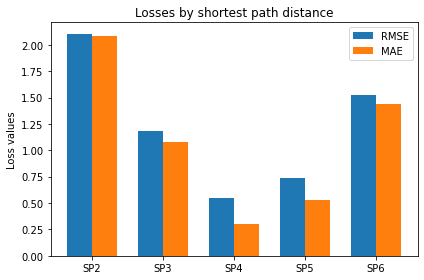

### EMBEDDING RUN harp_node2vec ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (154907, 128)
Embedding method:  harp_node2vec Binary operator: avg
(154907, 128)
Embedded training set size: 1792196
Embedded test set size: 621081
Train test split summary: 
 Train X shape: (1792196, 128) Train y shape: (1792196,) 
 Test X shape: (621081, 128) Test y shape: (621081,)




Epoch 1/15
39205/39205 - 81s - loss: 0.6930 - mae: 0.6525 - val_loss: 0.4512 - val_mae: 0.5013
Epoch 2/15
39205/39205 - 81s - loss: 0.5269 - mae: 0.5613 - val_loss: 0.3843 - val_mae: 0.4481
Epoch 3/15
39205/39205 - 75s - loss: 0.4859 - mae: 0.5364 - val_loss: 0.3651 - val_mae: 0.4591
Epoch 4/15
39205/39205 - 79s - loss: 0.4642 - mae: 0.5234 - val_loss: 0.3369 - val_mae: 0.4195
Epoch 5/15
39205/39205 - 79s - loss: 0.4499 - mae: 0.5143 - val_loss: 0.3369 - val_mae: 0.4132
Epoch 6/15
39205/39205 - 74s - loss: 0.4406 - mae: 0.5085 - val_loss: 0.3132 - val_mae: 0.4028
Epoch 7/15
39205/39205 - 75s - loss: 0.4333 - mae: 0.5042

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 	 [0.         0.42743731 0.2793773  0.22389956 0.13068722 0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.03720591 0.37697586 0.63344196 0.14440014 0.        ]
F1 score: 	 [0.         0.06845335 0.32092021 0.33085386 0.13720189 0.        ]
RMSE at length 2: 2.814658196830477 MAE at length 2: 2.7715696717342886
RMSE at length 3: 1.5209437008707491 MAE at length 3: 1.3987445185706628
RMSE at length 4: 0.8854861379159678 MAE at length 4: 0.6765279796749565
RMSE at length 5: 0.6228690384839052 MAE at length 5: 0.3736939714715288
RMSE at length 6: 1.2176960282651117 MAE at length 6: 1.0630663283798478


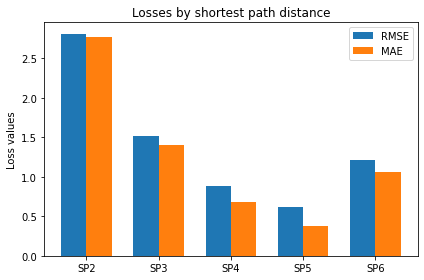

Embedding method:  harp_node2vec Binary operator: concat
(154907, 128)
Embedded training set size: 1792196
Embedded test set size: 621081
Train test split summary: 
 Train X shape: (1792196, 256) Train y shape: (1792196,) 
 Test X shape: (621081, 256) Test y shape: (621081,)




Epoch 1/15
39205/39205 - 86s - loss: 0.6213 - mae: 0.6091 - val_loss: 0.4066 - val_mae: 0.4611
Epoch 2/15
39205/39205 - 81s - loss: 0.4692 - mae: 0.5235 - val_loss: 0.3538 - val_mae: 0.4157
Epoch 3/15
39205/39205 - 84s - loss: 0.4340 - mae: 0.5010 - val_loss: 0.3295 - val_mae: 0.4118
Epoch 4/15
39205/39205 - 89s - loss: 0.4143 - mae: 0.4882 - val_loss: 0.3113 - val_mae: 0.3848
Epoch 5/15
39205/39205 - 81s - loss: 0.4010 - mae: 0.4796 - val_loss: 0.3014 - val_mae: 0.3820
Epoch 6/15
39205/39205 - 81s - loss: 0.3920 - mae: 0.4734 - val_loss: 0.2945 - val_mae: 0.3682
Epoch 7/15
39205/39205 - 82s - loss: 0.3847 - mae: 0.4684 - val_loss: 0.2892 - val_mae: 0.3809
Epoch 8/15
39205/39205 - 87s - loss: 0.3789 - mae: 0.46

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 	 [0.         0.73196517 0.26127309 0.31275364 0.17913683 0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.19003365 0.5148509  0.6428675  0.06890178 0.        ]
F1 score: 	 [0.         0.30173143 0.3466371  0.4207926  0.09952359 0.        ]
RMSE at length 2: 2.4325204369253552 MAE at length 2: 2.3792969884768085
RMSE at length 3: 1.275968619421294 MAE at length 3: 1.0791069548762924
RMSE at length 4: 0.7168463567397277 MAE at length 4: 0.4947222986157493
RMSE at length 5: 0.6246554149419775 MAE at length 5: 0.36815312874445727
RMSE at length 6: 1.2657560807526484 MAE at length 6: 1.151975353388909


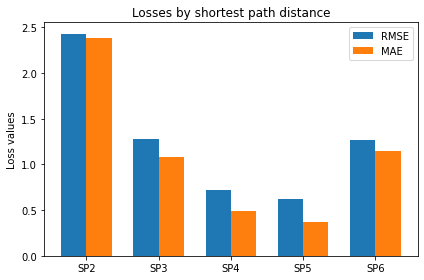

Embedding method:  harp_node2vec Binary operator: conv
(154907, 128)
Embedded training set size: 1792196
Embedded test set size: 621081
Train test split summary: 
 Train X shape: (1792196, 2, 128, 1) Train y shape: (1792196,) 
 Test X shape: (621081, 2, 128, 1) Test y shape: (621081,)




Epoch 1/15
39205/39205 - 140s - loss: 0.5596 - mae: 0.5797 - val_loss: 0.3556 - val_mae: 0.4259
Epoch 2/15
39205/39205 - 140s - loss: 0.4517 - mae: 0.5152 - val_loss: 0.3264 - val_mae: 0.3978
Epoch 3/15
39205/39205 - 124s - loss: 0.4307 - mae: 0.5018 - val_loss: 0.3092 - val_mae: 0.4047
Epoch 4/15
39205/39205 - 169s - loss: 0.4201 - mae: 0.4949 - val_loss: 0.2988 - val_mae: 0.4000
Epoch 5/15
39205/39205 - 203s - loss: 0.4122 - mae: 0.4899 - val_loss: 0.2869 - val_mae: 0.3874
Epoch 6/15
39205/39205 - 184s - loss: 0.4072 - mae: 0.4863 - val_loss: 0.2826 - val_mae: 0.3774
Epoch 7/15
39205/39205 - 176s - loss: 0.4031 - mae: 0.4837 - val_loss: 0.2971 - val_mae: 0.3855
Epoch 8/15
39205/39205 - 173s - loss: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.15850453 0.63035137 0.59129798 0.02033345 0.        ]
F1 score: 	 [0.         0.26021268 0.36185668 0.46049785 0.03732535 0.        ]
RMSE at length 2: 2.2383374658193405 MAE at length 2: 2.1977728285077953
RMSE at length 3: 1.167464063415864 MAE at length 3: 1.015028319372776
RMSE at length 4: 0.6128894848230049 MAE at length 4: 0.37163923047708847
RMSE at length 5: 0.6613725597821937 MAE at length 5: 0.4182725697756951
RMSE at length 6: 1.3638792934402324 MAE at length 6: 1.270967741935484


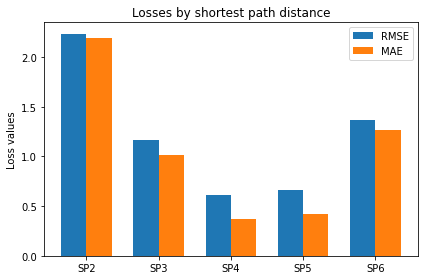

### EMBEDDING RUN harp_line ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (154907, 128)
Embedding method:  harp_line Binary operator: avg
(154907, 128)
Embedded training set size: 1792196
Embedded test set size: 621081
Train test split summary: 
 Train X shape: (1792196, 128) Train y shape: (1792196,) 
 Test X shape: (621081, 128) Test y shape: (621081,)




Epoch 1/15
39205/39205 - 63s - loss: 0.7329 - mae: 0.6761 - val_loss: 0.5100 - val_mae: 0.5449
Epoch 2/15
39205/39205 - 63s - loss: 0.5807 - mae: 0.5949 - val_loss: 0.4560 - val_mae: 0.4977
Epoch 3/15
39205/39205 - 62s - loss: 0.5447 - mae: 0.5733 - val_loss: 0.4388 - val_mae: 0.5110
Epoch 4/15
39205/39205 - 53s - loss: 0.5241 - mae: 0.5605 - val_loss: 0.4109 - val_mae: 0.4667
Epoch 5/15
39205/39205 - 53s - loss: 0.5105 - mae: 0.5522 - val_loss: 0.4191 - val_mae: 0.4908
Epoch 6/15
39205/39205 - 53s - loss: 0.5000 - mae: 0.5456 - val_loss: 0.3979 - val_mae: 0.4690
Epoch 7/15
39205/39205 - 62s - loss: 0.4923 - mae: 0.5408 - val_l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 	 [0.         0.59851301 0.22394211 0.24526914 0.0732786  0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.00935799 0.30134627 0.66938875 0.1465386  0.        ]
F1 score: 	 [0.         0.01842785 0.25694123 0.3589985  0.09770066 0.        ]
RMSE at length 2: 2.7954425784109267 MAE at length 2: 2.7192601917304153
RMSE at length 3: 1.6856007998662021 MAE at length 3: 1.5821390975258491
RMSE at length 4: 0.9715535177084065 MAE at length 4: 0.7801765345276915
RMSE at length 5: 0.5853279211609412 MAE at length 5: 0.3346104238057805
RMSE at length 6: 1.168187103634302 MAE at length 6: 1.0233055454874955


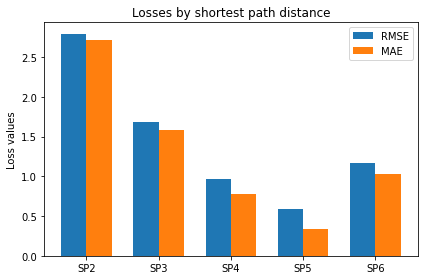

Embedding method:  harp_line Binary operator: concat
(154907, 128)
Embedded training set size: 1792196
Embedded test set size: 621081
Train test split summary: 
 Train X shape: (1792196, 256) Train y shape: (1792196,) 
 Test X shape: (621081, 256) Test y shape: (621081,)




Epoch 1/15
39205/39205 - 67s - loss: 0.6735 - mae: 0.6400 - val_loss: 0.4716 - val_mae: 0.5008
Epoch 2/15
39205/39205 - 61s - loss: 0.5340 - mae: 0.5620 - val_loss: 0.4345 - val_mae: 0.4766
Epoch 3/15
39205/39205 - 60s - loss: 0.5005 - mae: 0.5409 - val_loss: 0.3966 - val_mae: 0.4597
Epoch 4/15
39205/39205 - 59s - loss: 0.4826 - mae: 0.5293 - val_loss: 0.3896 - val_mae: 0.4608
Epoch 5/15
39205/39205 - 59s - loss: 0.4705 - mae: 0.5214 - val_loss: 0.3984 - val_mae: 0.4633
Epoch 6/15
39205/39205 - 68s - loss: 0.4624 - mae: 0.5166 - val_loss: 0.4028 - val_mae: 0.4646
Epoch 7/15
39205/39205 - 68s - loss: 0.4546 - mae: 0.5112 - val_loss: 0.3824 - val_mae: 0.4187
Epoch 8/15
39205/39205 - 59s - loss: 0.4495 - mae: 0.5079 -

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 	 [0.         0.38040876 0.26493248 0.52535714 0.23943662]
Recall: 	 [0.00000000e+00 4.70004715e-01 7.06576828e-01 8.98135499e-02
 6.16165277e-04]
F1 score: 	 [0.         0.42048701 0.38536976 0.15340194 0.00122917]
RMSE at length 2: 1.6994351387562714 MAE at length 2: 1.629359930279849
RMSE at length 3: 0.7564474773698481 MAE at length 3: 0.5440677856640037
RMSE at length 4: 0.5418486583627575 MAE at length 4: 0.29348210427061644
RMSE at length 5: 1.1558082030718064 MAE at length 5: 1.0520885008433376
RMSE at length 6: 2.0425165525261333 MAE at length 6: 1.9863718738673433


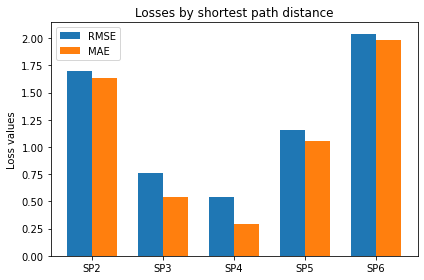

Embedding method:  harp_line Binary operator: conv
(154907, 128)
Embedded training set size: 1792196
Embedded test set size: 621081
Train test split summary: 
 Train X shape: (1792196, 2, 128, 1) Train y shape: (1792196,) 
 Test X shape: (621081, 2, 128, 1) Test y shape: (621081,)




Epoch 1/15
39205/39205 - 82s - loss: 0.6349 - mae: 0.6208 - val_loss: 0.4260 - val_mae: 0.4815
Epoch 2/15
39205/39205 - 82s - loss: 0.5341 - mae: 0.5638 - val_loss: 0.3906 - val_mae: 0.4597
Epoch 3/15
39205/39205 - 82s - loss: 0.5083 - mae: 0.5481 - val_loss: 0.3876 - val_mae: 0.4445
Epoch 4/15
39205/39205 - 78s - loss: 0.4952 - mae: 0.5404 - val_loss: 0.3774 - val_mae: 0.4449
Epoch 5/15
39205/39205 - 82s - loss: 0.4881 - mae: 0.5359 - val_loss: 0.3992 - val_mae: 0.4655
Epoch 6/15
39205/39205 - 78s - loss: 0.4818 - mae: 0.5322 - val_loss: 0.3728 - val_mae: 0.4580
Epoch 7/15
39205/39205 - 78s - loss: 0.4776 - mae: 0.5293 - val_loss: 0.3528 - val_mae: 0.4281
Epoch 8/15
39205/39205 - 82s - loss: 0.4749 - mae

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 	 [0.         0.47369976 0.24677849 0.33073898 0.16853933]
Recall: 	 [0.00000000e+00 2.07051104e-02 7.77229927e-01 3.36319995e-01
 5.43675245e-04]
F1 score: 	 [0.         0.03967601 0.37461338 0.33350614 0.00108385]
RMSE at length 2: 2.2276581566994627 MAE at length 2: 2.1924921726219297
RMSE at length 3: 1.1456190845038072 MAE at length 3: 1.0903442886573969
RMSE at length 4: 0.472068479295297 MAE at length 4: 0.22279626501132807
RMSE at length 5: 0.8246518517399387 MAE at length 5: 0.6691368954490295
RMSE at length 6: 1.6816602369656954 MAE at length 6: 1.606886553098949


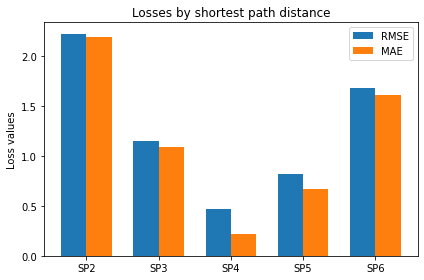

In [ ]:
landmark_techniques = ["random"]
embedding_techniques = ["node2vec", "harp_node2vec", "harp_line"]
for landmark_technique in landmark_techniques:
  print("### LANDMARK RUN", landmark_technique, "###")
  train_list1, train_list2, y_train = load_training_data(dataset, landmark_technique)
  test_list1, test_list2, y_test = load_testing_data(dataset, landmark_technique)
  for embedding_technique in embedding_techniques:
    print("### EMBEDDING RUN", embedding_technique, "###")
    train_test_loop(emb_method = embedding_technique, epochs= 15,dataset= dataset) # No embeddings params set as default values are the optimised ones